In [78]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [79]:
churn_data = pd.read_csv('churn_clean.csv')

In [80]:
churn_data[churn_data.duplicated()==True]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [81]:
churn_data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [82]:
churn_data= churn_data.drop(['CaseOrder', 'Customer_id','Interaction','UID','City','County','Zip','Lat','Lng','Population','TimeZone','Email','Contacts','Techie','Children','Job'], axis=1)

In [83]:
churn_data.columns

Index(['State', 'Area', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Yearly_equip_failure', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3',
       'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [84]:
churn_data[churn_data.isna().any(axis=1)]

,State,Area,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,Contract,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
5,GA,Urban,83,22660.20,Never Married,Female,No,8.420993,1,One year,...,185.007692,1039.357983,3,3,3,2,4,3,3,3
15,WI,Suburban,39,89061.45,Divorced,Male,Yes,10.798470,0,One year,...,177.650760,1840.014467,3,3,3,2,4,3,5,2
17,NC,Rural,60,44142.81,Separated,Male,Yes,9.831167,0,Two Year,...,202.682861,882.098593,2,2,4,3,3,4,3,3
18,TN,Rural,61,39262.14,Widowed,Female,No,9.574706,0,Two Year,...,152.490739,1833.096700,3,4,3,4,3,2,3,5
24,OH,Rural,75,28520.32,Widowed,Female,Yes,13.747780,0,Month-to-month,...,162.511928,870.763980,3,3,4,2,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,KS,Rural,89,24239.77,Divorced,Male,No,11.262710,0,Month-to-month,...,92.501800,4831.925127,4,4,2,3,4,2,2,3
9984,AK,Rural,50,40935.12,Never Married,Female,No,11.064190,1,Two Year,...,125.007300,4012.731737,6,5,6,2,2,5,3,5
9987,IL,Urban,61,102629.60,Married,Female,No,8.373844,0,One year,...,220.161500,5135.575997,4,4,3,5,3,3,3,3
9989,SD,Rural,51,25432.25,Separated,Female,No,11.728370,2,Month-to-month,...,114.983800,4546.313629,3,4,3,3,4,3,2,2


In [85]:
churn_data = churn_data.drop(['InternetService'],axis=1)

In [86]:
churn_data.info

<bound method DataFrame.info of      State      Area  Age    Income        Marital  Gender Churn  \
0       AK     Urban   68  28561.99        Widowed    Male    No   
1       MI     Urban   27  21704.77        Married  Female   Yes   
2       OR     Urban   50   9609.57        Widowed  Female    No   
3       CA  Suburban   48  18925.23        Married    Male    No   
4       TX  Suburban   83  40074.19      Separated    Male   Yes   
...    ...       ...  ...       ...            ...     ...   ...   
9995    VT     Rural   23  55723.74        Married    Male    No   
9996    TN     Rural   48  34129.34       Divorced    Male    No   
9997    TX     Rural   48  45983.43  Never Married  Female    No   
9998    GA     Urban   39  16667.58      Separated    Male    No   
9999    GA     Urban   28   9020.92  Never Married    Male    No   

      Outage_sec_perweek  Yearly_equip_failure        Contract  ...  \
0               7.978323                     1        One year  ...   
1        

In [87]:
churn_data[churn_data.isna().any(axis=1)]

,State,Area,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,Contract,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [88]:
print(churn_data[churn_data.duplicated()==True])
churn_data.columns

Empty DataFrame
Columns: [State, Area, Age, Income, Marital, Gender, Churn, Outage_sec_perweek, Yearly_equip_failure, Contract, Port_modem, Tablet, Phone, Multiple, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Tenure, MonthlyCharge, Bandwidth_GB_Year, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8]
Index: []

[0 rows x 33 columns]


Index(['State', 'Area', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Yearly_equip_failure', 'Contract', 'Port_modem',
       'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [89]:
le = LabelEncoder()
churn_data['State'] = le.fit_transform(churn_data['State'])
churn_data['Area'] = le.fit_transform(churn_data['Area'])
churn_data['Marital'] = le.fit_transform(churn_data['Marital'])
churn_data['Gender'] = le.fit_transform(churn_data['Gender'])
churn_data['Contract'] = le.fit_transform(churn_data['Contract'])
churn_data['PaymentMethod'] = le.fit_transform(churn_data['PaymentMethod'])


In [90]:
churn_data['Port_modem'] = churn_data['Port_modem'].map({'No': 0, 'Yes': 1})
churn_data['DeviceProtection'] = churn_data['DeviceProtection'].map({'No': 0, 'Yes': 1})
churn_data['TechSupport'] = churn_data['TechSupport'].map({'No': 0, 'Yes': 1})
churn_data['StreamingTV'] = churn_data['StreamingTV'].map({'No': 0, 'Yes': 1})
churn_data['StreamingMovies'] = churn_data['StreamingMovies'].map({'No': 0, 'Yes': 1})
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].map({'No': 0, 'Yes': 1})
churn_data['Phone'] = churn_data['Phone'].map({'No': 0, 'Yes': 1})
churn_data['Multiple'] = churn_data['Multiple'].map({'No': 0, 'Yes': 1})
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].map({'No': 0, 'Yes': 1})
churn_data['OnlineBackup'] = churn_data['OnlineBackup'].map({'No': 0, 'Yes': 1})
churn_data['Tablet'] = churn_data['Tablet'].map({'No': 0, 'Yes': 1})
churn_data['Churn'] = churn_data['Churn'].map({'No': 0, 'Yes': 1})


In [91]:
churn_data.columns

Index(['State', 'Area', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Yearly_equip_failure', 'Contract', 'Port_modem',
       'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [92]:
churn_data[churn_data.isna().any(axis=1)]

,State,Area,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,Contract,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [93]:
churn_data.to_csv('churn_final_clean.csv', index=False)

In [94]:
X = churn_data.drop(['Churn'], axis=1)
y= churn_data['Churn']

In [95]:
print(X.head)


<bound method NDFrame.head of       State  Area  Age    Income  Marital  Gender  Outage_sec_perweek  \
0         0     2   68  28561.99        4       1            7.978323   
1        22     2   27  21704.77        1       0           11.699080   
2        37     2   50   9609.57        4       0           10.752800   
3         4     1   48  18925.23        1       1           14.913540   
4        44     1   83  40074.19        3       1            8.147417   
...     ...   ...  ...       ...      ...     ...                 ...   
9995     47     0   23  55723.74        1       1            9.415935   
9996     43     0   48  34129.34        0       1            6.740547   
9997     44     0   48  45983.43        2       0            6.590911   
9998     10     2   39  16667.58        3       1           12.071910   
9999     10     2   28   9020.92        2       1           11.754720   

      Yearly_equip_failure  Contract  Port_modem  ...  MonthlyCharge  \
0                    

In [96]:
print(y.head)

<bound method NDFrame.head of 0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Churn, Length: 10000, dtype: int64>


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)

In [98]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25)

In [99]:
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat ([X_val, y_val], axis=1)
test_data = pd.concat ([X_test, y_test], axis=1)

print(train_data.head())

      State  Area  Age     Income  Marital  Gender  Outage_sec_perweek  \
3682      9     2   57   46339.12        3       0            5.257295   
7565     33     1   71   27757.33        2       1           10.180120   
2358      4     1   23  116086.20        0       0           11.980030   
2742     49     1   60   21497.29        4       1           12.151040   
9818     34     2   34   19593.73        0       1           14.560500   

      Yearly_equip_failure  Contract  Port_modem  ...  Bandwidth_GB_Year  \
3682                     1         1           1  ...        1097.407168   
7565                     0         2           0  ...        5115.759017   
2358                     0         2           0  ...         612.054192   
2742                     1         2           0  ...        1322.914498   
9818                     0         1           1  ...        5276.417702   

      Item1  Item2  Item3  Item4  Item5  Item6  Item7  Item8  Churn  
3682      2      3      3   

In [100]:
train_data.to_csv('training_data.csv', index=False)
val_data.to_csv('validation_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_val)

In [102]:
y_pred_proba = rf.predict_proba(X_val)[:, 1]


Accuracy: 0.876
Precision: 0.7864077669902912
Recall: 0.6694214876033058
F1 Score: 0.7232142857142857
AUC-ROC: 0.9392812752131533


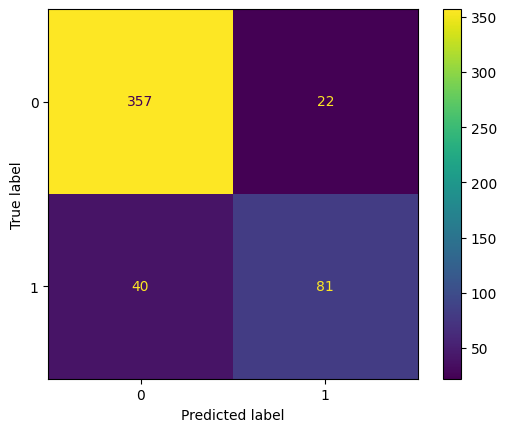

In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

#y_test: true labels, y_pred: predicted labels, y_pred_proba: predicted probabilities

# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision
precision = precision_score(y_val, y_pred)

# Recall
recall = recall_score(y_val, y_pred)

# F1 Score
f1 = f1_score(y_val, y_pred)

# AUC-ROC (for binary classification, use predicted probabilities)
auc_roc = roc_auc_score(y_val, y_pred_proba)

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Display Confusion Matrix (visualization)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)



In [104]:
from sklearn.model_selection import GridSearchCV

# Step 1: Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Step 2: Base model
rf = RandomForestClassifier(random_state=42)

# Step 3: GridSearchCV object with 5-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Step 4: Fit on training data
grid_search.fit(X_val, y_val)

# Step 5 & 6: Best parameters and best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation accuracy: 0.8440000000000001


In [105]:
y_optimized_pred = grid_search.predict(X_test)

y_optiimzed_proba = grid_search.predict_proba(X_test)[:, 1]

Accuracy: 0.8606666666666667
Precision: 0.8401360544217688
Recall: 0.6039119804400978
F1 Score: 0.7027027027027027
AUC-ROC: 0.7804161185426887


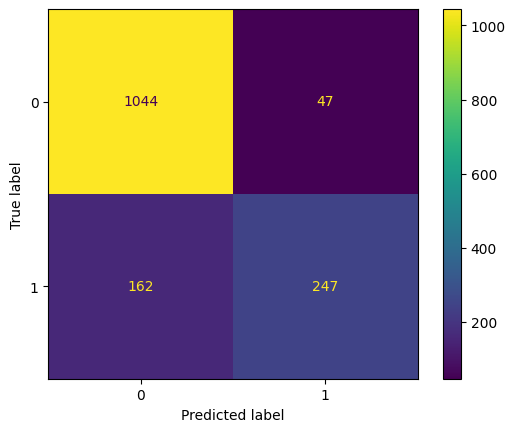

In [106]:
# Accuracy
accuracy = accuracy_score(y_test, y_optimized_pred)

# Precision
precision = precision_score(y_test, y_optimized_pred)

# Recall
recall = recall_score(y_test, y_optimized_pred)

# F1 Score
f1 = f1_score(y_test, y_optimized_pred)

# AUC-ROC (for binary classification, use predicted probabilities)
auc_roc = roc_auc_score(y_test, y_optimized_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_optimized_pred)

# Display Confusion Matrix (visualization)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

In [107]:
print(grid_search)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')


In [108]:
feature_names = X_train.columns

In [109]:
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_


                 Feature  Importance
21                Tenure    0.174628
23     Bandwidth_GB_Year    0.139272
22         MonthlyCharge    0.126787
8               Contract    0.066878
17           StreamingTV    0.046680
3                 Income    0.042714
18       StreamingMovies    0.039534
6     Outage_sec_perweek    0.038883
0                  State    0.035242
2                    Age    0.033705
28                 Item5    0.019745
31                 Item8    0.019004
24                 Item1    0.018333
4                Marital    0.018129
27                 Item4    0.017556
29                 Item6    0.015379
25                 Item2    0.014150
30                 Item7    0.014069
20         PaymentMethod    0.013961
26                 Item3    0.013746
1                   Area    0.010382
12              Multiple    0.008850
16           TechSupport    0.008612
7   Yearly_equip_failure    0.008469
9             Port_modem    0.008265
5                 Gender    0.007952
1

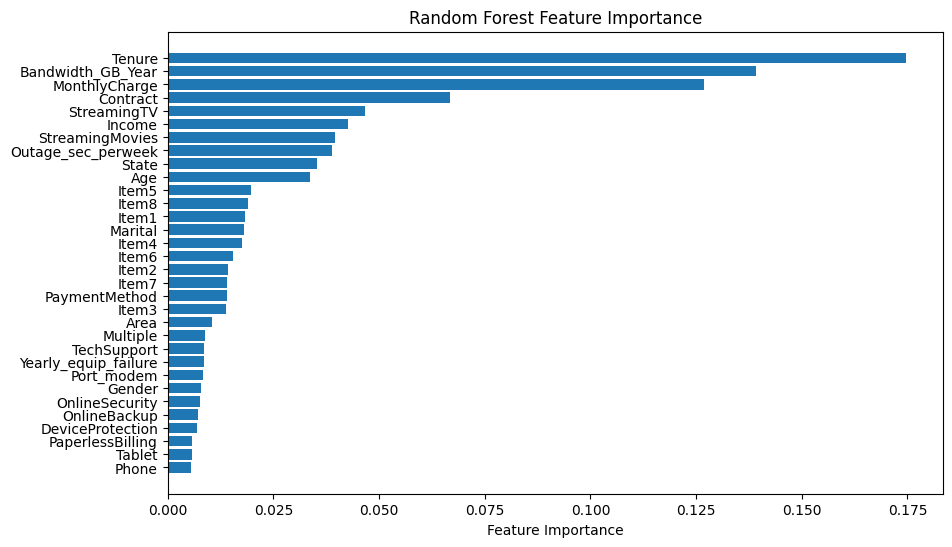

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance descending
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance table
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
